In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import seaborn as sns; sns.set()


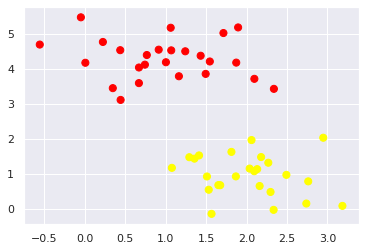

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="autumn", s=50)

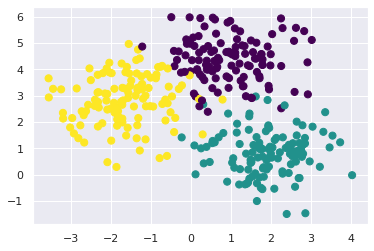

(-1, 3.5)

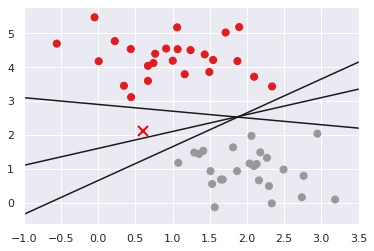

In [4]:
# Find solution by simply drawing..... hohohoh
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="Set1")
plt.plot([0.6], [2.1], "x", color="red", markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, "-k")
    
plt.xlim(-1, 3.5)    

(-1, 3.5)

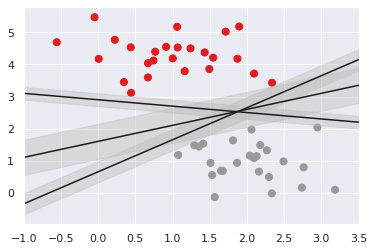

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="Set1")

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, "-k")
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor="none", color="#BBBBBB", alpha=0.4)
    
plt.xlim(-1, 3.5)    

In [6]:
from sklearn.svm import SVC  # support vector classifier
model = SVC(kernel="linear", C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create a grid
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors="k",
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=["--", "-", "--"])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, alpha=0.4)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    

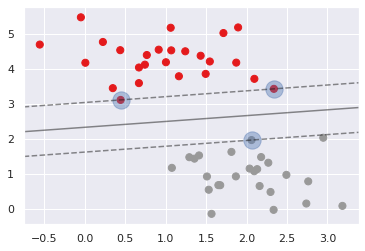

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="Set1")
plot_svc_decision_function(model)

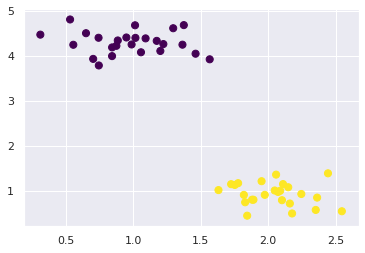

In [24]:
X2, y2 = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.260)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap="viridis", s=50)

In [25]:
#test with other dataset
model2 = SVC(kernel="linear", C=1E10)
model2.fit(X2, y2)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

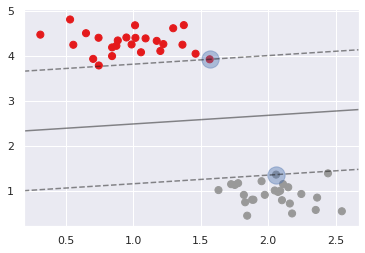

In [26]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap="Set1")
plot_svc_decision_function(model2)

In [27]:
model2.support_vectors_

array([[1.56640628, 3.92565225],
       [2.05799753, 1.36198999]])

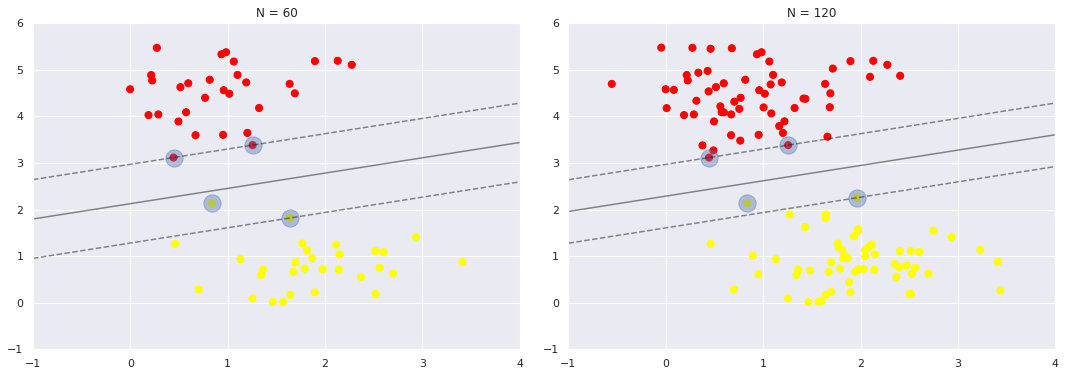

In [35]:
def plot_svm(N=10, ax=None):
    X,y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    
    X = X[:N]
    y = y[:N]
    model = SVC(kernel="linear", C=1E00)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
    

fig, ax = plt.subplots(1, 2, figsize=(16, 6))    
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title("N = {0}".format(N))

In [37]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200, 1000], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200, 1000), value=10), Output()), _dom_classes=('…

<function __main__.plot_svm(N=10, ax=None)>